# Topic Modeling with LSA and LDA

National Public Radio (NPR) wants to extract topics from stories it has published and categorize them in order to compare similar stories and analyze changes between them.

These articles include presidential speeches, international or national politics, science, health and sports, etc. on various topics.

This project will access articles by most discussed topics and analyze the most significant changes that are occurring, and what percentage of each topic was covered in each article.

In this notebook, two topic modeling algorithms are explored: LSA and LDA using Bag of words and TF-IDF.

These techniques are applied to the dataset which is a corpus of over 11,000 news articles published by NPR.

## Import libraries

In [46]:
import re
import spacy
import joblib
import numpy as np
import pandas as pd

from spacy.lang.en.stop_words import STOP_WORDS as en_stop
import en_core_web_sm

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# from bokeh.models import Label
# from bokeh.io import output_notebook
# from bokeh.plotting import figure, output_file, show
# output_notebook()

from collections import Counter

import seaborn as sb
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline

# from textblob import TextBlob, Word
# # import scipy.stats as stats
# from IPython.display import display
# from tqdm import tqdm

# import ast

# from gensim.summarization import keywords
# import gensim

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
datafile = '../Topic modeling/Data/npr.csv'
npr_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

In [13]:
npr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  11992 non-null  object
dtypes: object(1)
memory usage: 93.8+ KB


## Data cleaning

In [14]:
def clean_txt(txt: str) -> str:
    txt = re.sub(r'[^\w]', ' ', txt)
    return txt

In [15]:
def remove_digit(txt: str) -> str:
  result = ''.join([i for i in txt if not i.isdigit()])
  return result

In [16]:
# English stop words
list_stopWords = ['year', 'time', 'know', 'come', 'use', 'tell', 'want', 'day', 'say', 'says', 'ha', 'wa', 'like', 'think', 'make', 'new', 'song', 'time', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'A', 'a', 'B', 'b', 'C', 'c', 'D', 'd', 'E', 'e', 'F', 'f', 'G', 'g', 'H', 'h', 'I', 'i', 'J', 'j', 'K', 'k', 'L', 'l', 'M', 'm', 'N', 'n', 'O', 'o', 'P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', 'T', 't', 'U', 'u', 'V', 'v', 'W', 'w', 'X', 'x', 'Y', 'y', 'Z', 'z']

In [17]:
def stop_words(txt: str):
    
    string_txt = " " 
    list_words = []
    
    sentence = txt.split()

    for val in sentence:
        if val not in list_stopWords:
            list_words.append(val)

    return string_txt.join(list_words)

In [18]:
list_stopWords = list(en_stop)

def remove_stop_words(txt: str):
    
    string_txt = " " 
    list_words = []
    
    sentence = txt.split()

    for val in sentence:
        if val not in list_stopWords:
            list_words.append(val)

    return string_txt.join(list_words)

In [19]:
lemmatizer = WordNetLemmatizer()
 
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

def lemmatization(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:                        
          res_words.append(word)
        else:
          res_words.append(lemmatizer.lemmatize(word, tag))
      
    return " ".join(res_words)

In [ ]:
# npr_data['Article'] = npr_data['Article'].apply(lambda x: clean_txt(x))  

In [ ]:
# npr_data['Article'] = npr_data['Article'].apply(lambda x: remove_digit(x))

In [ ]:
# npr_data['Article'] = npr_data['Article'].apply(lambda x: lemmatization(x))

In [ ]:
# npr_data['Article'] = npr_data['Article'].apply(lambda x: remove_stop_words(x)) 

In [ ]:
# npr_data.to_csv('../Topic modeling/Data/data_npr_cleaning.csv')

In [22]:
data = pd.read_csv('../Topic modeling/Data/data_npr_cleaning.csv', parse_dates=[0], infer_datetime_format=True)

In [23]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [24]:
data.head()

,Article
0,In Washington policy bipartisan politics And s...
1,Donald Trump use Twitter preferred mean commun...
2,Donald Trump unabashedly praising Russian Pres...
3,Updated p m ET Russian President Vladimir Puti...
4,From photography illustration video data visua...


In [25]:
data['Article'] = data['Article'].apply(lambda x: stop_words(x))   

We first develop a list of the main words used in the 11991 articles, giving us an overview of the basic vocabulary of the source data. Stop words are omitted here to avoid trivial conjunctions, prepositions, etc.

## Get first n words of all data

In [27]:
def get_top_n_words_from_all(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

### Using bag of words

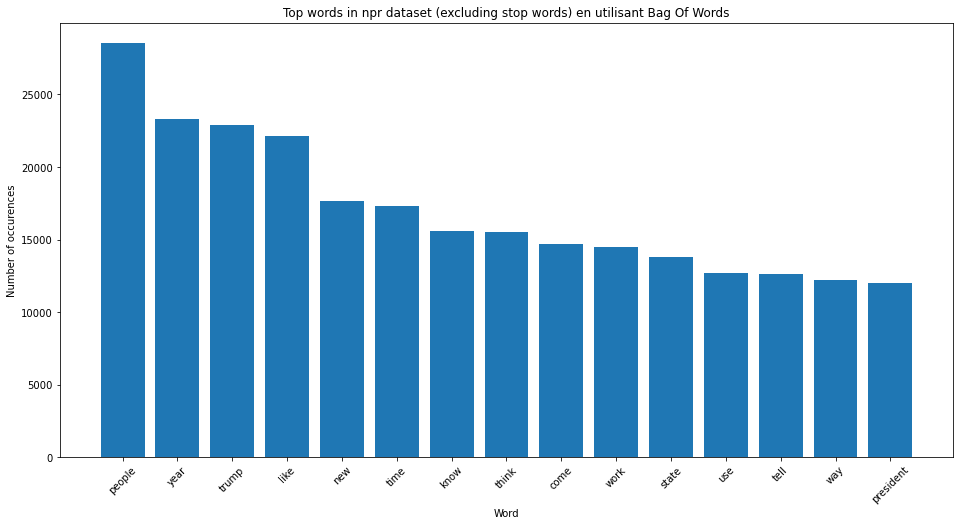

In [28]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words_from_all(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data['Article'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in npr dataset (excluding stop words) en utilisant Bag Of Words');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.xticks(rotation = 45);
plt.show()

### Using TF-IDF

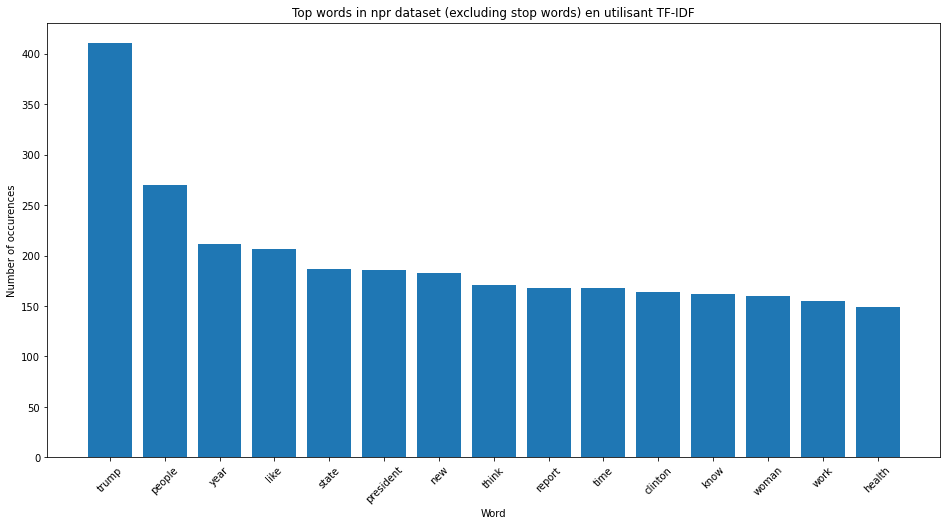

In [29]:
count_vectorizer_Tfidf = TfidfVectorizer(stop_words='english')
words_Tfidf, word_values_Tfidf = get_top_n_words_from_all(n_top_words=15,
                                     count_vectorizer=count_vectorizer_Tfidf, 
                                     text_data=data['Article'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words_Tfidf)), word_values_Tfidf);
ax.set_xticks(range(len(words_Tfidf)));
ax.set_xticklabels(words_Tfidf, rotation='vertical');
ax.set_title('Top words in npr dataset (excluding stop words) en utilisant TF-IDF');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.xticks(rotation = 45);
plt.show()

## Topic Modelling

We now apply a clustering algorithm to the corpus of articles in order to study the thematic focus of npr news. To do this, we first experiment with a small subsample of the dataset to determine which of the two potential clustering algorithms is more appropriate - once this has been verified, we then evolve to a more much of the available data.

### Pretreatment

The only preprocessing step required in our case is feature construction, where we take the sample of items and represent them in a processable feature space. In practice, this simply means converting each string to a numeric vector. This can be done using SKLearn's CountVectorizer object, which produces an n × K matrix of document terms where K is the number of distinct words in the n titles in our sample (minus stop words and with a limit of max_features ).

In [30]:
n_topics = 8
data_sample = 5000

In [42]:
def get_keys(topic_matrix): 
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

In [43]:
def keys_to_counts(keys): 
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [48]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer): 
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)): 
            if keys[i] == topic:
              temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [31]:
class EmbeddingData:
    def __init__(self, indexed_data, sample_of_data, number_topics):
        self.sample_of_data = sample_of_data
        self.number_topics = number_topics
        self.indexed_data = indexed_data
        self.sample_text_sample = self.indexed_data.sample(n=self.sample_of_data, random_state=0).values

    def BagOfWords(self):
        sample_count_vectorizer = CountVectorizer(stop_words='english', max_features=6000)
        return sample_count_vectorizer

    def TFIDF(self):
        sample_count_vectorizer_Tfidf = TfidfVectorizer(stop_words='english')
        return sample_count_vectorizer_Tfidf

    def document_term_matrix(self, embedding):
        return embedding.fit_transform(self.sample_text_sample)

In [33]:
class TopicModeling(EmbeddingData):
    def __init__(self, indexed_data, sample_of_data, number_topics, embedding):
        self.embedding = embedding
        super().__init__(indexed_data, sample_of_data, number_topics) 

    def LSA(self):
        lsa_model = TruncatedSVD(n_components=self.number_topics)
        return lsa_model.fit_transform(self.embedding.fit_transform(self.sample_text_sample))

    def LDA(self):
        lda_model = LatentDirichletAllocation(n_components=self.number_topics, 
                                              learning_method='online', 
                                              random_state=0, verbose=0, 
                                              batch_size=128, evaluate_every = -1, 
                                              n_jobs = -1)
        return lda_model.fit_transform(self.embedding.fit_transform(self.sample_text_sample)) 

In [49]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [50]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [32]:
temp = EmbeddingData(data['Article'], data_sample, n_topics)

### Bag of words

In [34]:
BagOfWords_vectorizer = temp.BagOfWords()

### TF-IDF

In [35]:
TFIDF_vectorizer = temp.TFIDF()

## LDA  with Bag Of Words

In [36]:
LDA_document_term_matrix = temp.document_term_matrix(BagOfWords_vectorizer)

In [37]:
BOW_model = TopicModeling(data['Article'], data_sample, n_topics, BagOfWords_vectorizer)

In [38]:
LDA = BOW_model.LDA()

In [52]:
# joblib.dump(LDA, '../Topic modeling/Data/model_lda_BOW_ALL.pkl') 

['../Topic modeling/Data/model_lda_BOW_ALL.pkl']

In [53]:
lda_BOW_model = joblib.load("../Topic modeling/Data/model_lda_BOW_ALL.pkl")

In [54]:
LDA_keys = get_keys(lda_BOW_model) 

In [55]:
LDA_categories, LDA_counts = keys_to_counts(LDA_keys)

In [56]:
LDA_top_n_words = get_top_n_words(10, LDA_keys, LDA_document_term_matrix, BagOfWords_vectorizer)

In [57]:
for i in range(len(LDA_top_n_words)):
    print("Topic {}: ".format(i+1), LDA_top_n_words[i])

Topic 1:  report trump people president year police tell state court government
Topic 2:  people health year state trump company new percent care work
Topic 3:  year people like food come new time day water use
Topic 4:  people like school think know year time work want student
Topic 5:  like year new time know music people come think song
Topic 6:  trump clinton president campaign state vote people win new candidate
Topic 7:  trump people like company right law state year use come
Topic 8:  people study health use drug year disease like new patient


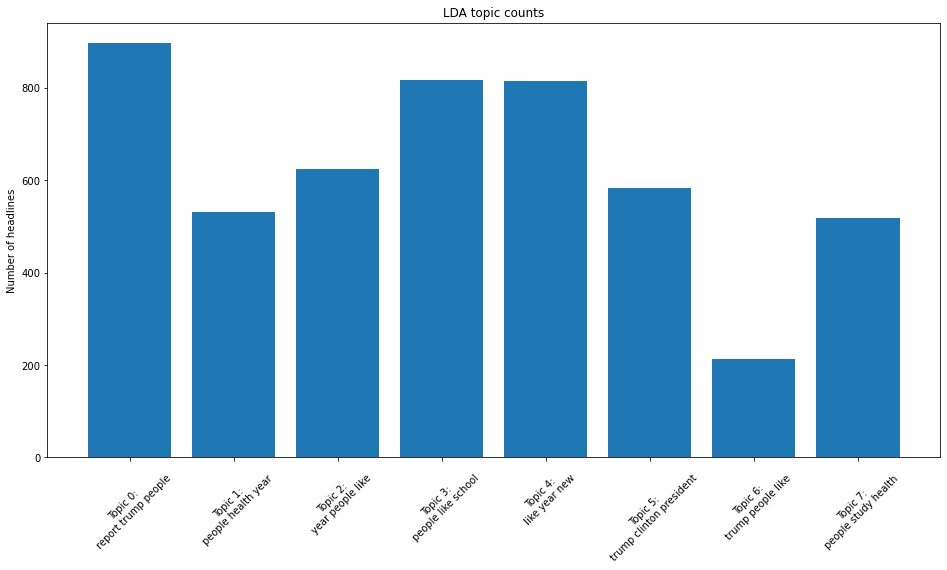

In [58]:
top_3_words = get_top_n_words(3, LDA_keys, LDA_document_term_matrix, BagOfWords_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in LDA_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(LDA_categories, LDA_counts);
ax.set_xticks(LDA_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LDA topic counts');
plt.xticks(rotation = 45);
plt.show()

In [59]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_BOW_model)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.010s...
[t-SNE] Computed neighbors for 5000 samples in 0.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.088595
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.159126
[t-SNE] KL divergence after 2000 iterations: 1.055989


In [87]:
top_3_words_lda = get_top_n_words(3, LDA_keys, LDA_document_term_matrix, BagOfWords_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(LDA_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[LDA_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot) 

## LSA with Bag of Words

In [61]:
LSA_BOW_document_term_matrix = temp.document_term_matrix(BagOfWords_vectorizer) 

In [62]:
LSA_BOW = BOW_model.LSA()

In [63]:
joblib.dump(LSA_BOW, '../Topic modeling/Data/model_lsa_BOW_ALL.pkl') 

['../Topic modeling/Data/model_lsa_BOW_ALL.pkl']

In [64]:
lsa_BOW_model = joblib.load("../Topic modeling/Data/model_lsa_BOW_ALL.pkl")

In [65]:
LSA_BOW_keys = get_keys(lsa_BOW_model)

In [66]:
LSA_BOW_categories, LSA_BOW_counts = keys_to_counts(LSA_BOW_keys)

In [67]:
LSA_BOW_top_n_words = get_top_n_words(10, LSA_BOW_keys, LSA_BOW_document_term_matrix, BagOfWords_vectorizer)

In [68]:
for i in range(len(LSA_BOW_top_n_words)):
    print("Topic {}: ".format(i+1), LSA_BOW_top_n_words[i])

Topic 1:  people year like new time know think come work trump
Topic 2:  trump president campaign clinton state house win new tell comey
Topic 3:  health state care drug company hospital people patient plan insurance
Topic 4:  school student education teacher year state district child kid like
Topic 5:  police court report officer attack target kill shoot case supreme
Topic 6:  clinton state sanders vote win county percent delegate campaign democratic
Topic 7:  drug orphan la fda company approval disease el en year
Topic 8:  best winner album job songwriter engineer conductor country producer percent


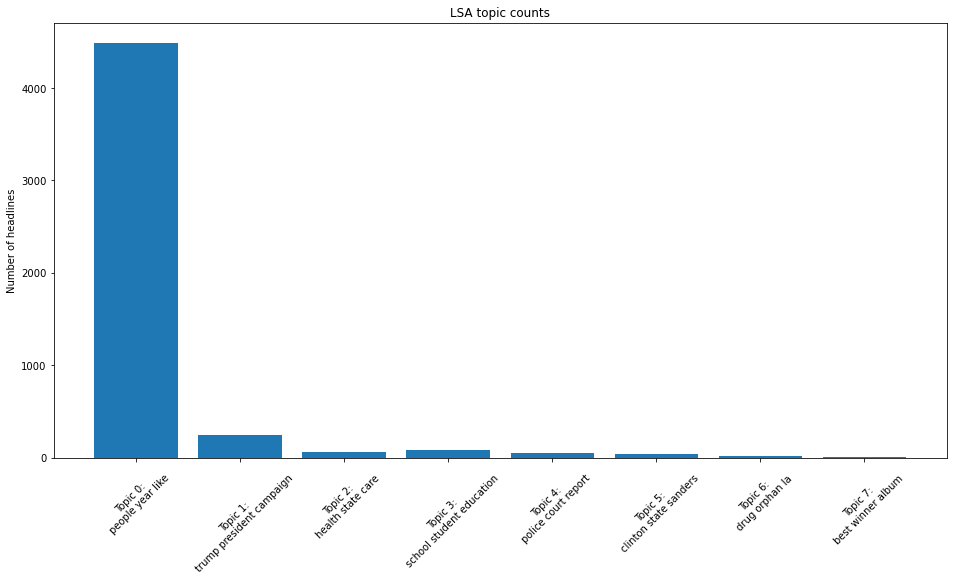

In [69]:
top_3_words = get_top_n_words(3, LSA_BOW_keys, LSA_BOW_document_term_matrix, BagOfWords_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in LSA_BOW_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(LSA_BOW_categories, LSA_BOW_counts);
ax.set_xticks(LSA_BOW_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.xticks(rotation = 45);
plt.show()

In [70]:
tsne_lsa_model_BOW = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors_BOW = tsne_lsa_model_BOW.fit_transform(lsa_BOW_model)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 0.457s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.320033
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.472687
[t-SNE] KL divergence after 2000 iterations: 1.406140


In [86]:
top_3_words_lsa = get_top_n_words(3, LSA_BOW_keys, LSA_BOW_document_term_matrix, BagOfWords_vectorizer)
lSa_mean_topic_vectors = get_mean_topic_vectors(LSA_BOW_keys, tsne_lsa_vectors_BOW)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors_BOW[:,0], y=tsne_lsa_vectors_BOW[:,1], color=colormap[LSA_BOW_keys])

for t in range(n_topics):
    label = Label(x=lSa_mean_topic_vectors[t][0], y=lSa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot) 

### LSA with TF-IDF

In [74]:
LSA_TFIDF_document_term_matrix = temp.document_term_matrix(TFIDF_vectorizer)

In [75]:
LSA_TFIDF_model = TopicModeling(data['Article'], data_sample, n_topics, TFIDF_vectorizer)

In [76]:
LSA_TFIDF = LSA_TFIDF_model.LSA()

In [77]:
joblib.dump(LSA_TFIDF, '../Topic modeling/Data/model_lsa_TFIDF_ALL.pkl') 

['../Topic modeling/Data/model_lsa_TFIDF_ALL.pkl']

In [78]:
lsa_TFIDF_model = joblib.load("../Topic modeling/Data/model_lsa_TFIDF_ALL.pkl")

In [79]:
LSA_TFIDF_keys = get_keys(lsa_TFIDF_model)

In [80]:
LSA_TFIDF_categories, LSA_TFIDF_counts = keys_to_counts(LSA_TFIDF_keys)

In [81]:
LSA_TFIDF_top_n_words = get_top_n_words(10, LSA_TFIDF_keys, LSA_TFIDF_document_term_matrix, TFIDF_vectorizer)

In [82]:
for i in range(len(LSA_TFIDF_top_n_words)):
    print("Topic {}: ".format(i+1), LSA_TFIDF_top_n_words[i])

Topic 1:  trump people like year new president think time know woman
Topic 2:  trump clinton cruz campaign donald republican delegate president rubio nominee
Topic 3:  health insurance care coverage medicaid patient medicare plan hospital obamacare
Topic 4:  sanders clinton delegate vote campaign democratic voter percent primary bernie
Topic 5:  police attack officer isis report kill force civilian syrian aleppo
Topic 6:  student school education teacher college kid district university program class
Topic 7:  zika virus mosquito disease spread health outbreak microcephaly case vaccine
Topic 8:  comey fbi investigation sessions committee trump russia court mueller president


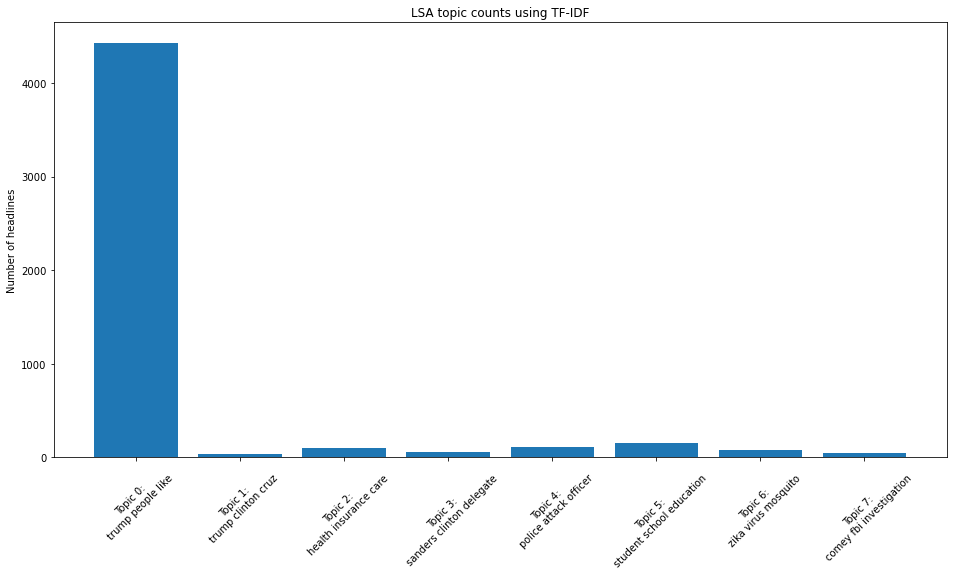

In [83]:
top_3_words = get_top_n_words(3, LSA_TFIDF_keys, LSA_TFIDF_document_term_matrix, TFIDF_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in LSA_TFIDF_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(LSA_TFIDF_categories, LSA_TFIDF_counts);
ax.set_xticks(LSA_TFIDF_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts using TF-IDF');
plt.xticks(rotation = 45);
plt.show()

In [84]:
tsne_lsa_model_TFIDF = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
LSA_TFIDF_tsne_vectors = tsne_lsa_model_TFIDF.fit_transform(lsa_TFIDF_model)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 0.432s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.025278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.571190
[t-SNE] KL divergence after 2000 iterations: 1.244053


In [88]:
top_3_words_lsa = get_top_n_words(3, LSA_TFIDF_keys, LSA_TFIDF_document_term_matrix, TFIDF_vectorizer)
lSa_mean_topic_vectors = get_mean_topic_vectors(LSA_TFIDF_keys, LSA_TFIDF_tsne_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=LSA_TFIDF_tsne_vectors[:,0], y=LSA_TFIDF_tsne_vectors[:,1], color=colormap[LSA_TFIDF_keys])

for t in range(n_topics):
    label = Label(x=lSa_mean_topic_vectors[t][0], y=lSa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)   